In [1]:
import numpy as np
import time

## Отдельный класс для сферы


In [2]:
class Sphere:
    def __init__(self, x, y, z,R):
        self.x2 = x
        self.y2 = y
        self.z2 = z
        self.R = R

## Класс лучей

In [3]:
class Vector:    
    def __init__(self, x0, y0, z0, x1, y1, z1):
        self.x0 = x0
        self.x1 = x1
        self.y0 = y0
        self.y1 = y1
        self.z0 = z0
        self.z1 = z1
        self.color = 1

## Класс наблюдателя

In [4]:
class Camera:
    def __init__(self):
        self.w_dots = 300
        self.h_dots = 300
        self.width = 6
        self.height = 6
        self.center = [10,0,0]
        self.camera_coor = [self.center, [self.center[0]+6, self.center[1], self.center[2]]]
        

## Генерация лучей

In [5]:
def generating_vectors(camera):
    max_y = max(camera.center[1]-camera.width/2,camera.center[1]+camera.width/2)
    min_y = min(camera.center[1]-camera.width/2,camera.center[1]+camera.width/2)
    max_z = max(camera.center[2]-camera.height/2,camera.center[2]+camera.height/2)
    min_z = min(camera.center[2]-camera.height/2,camera.center[2]+camera.height/2)
    dots_y = np.linspace(min_y,max_y,num = camera.w_dots)
    dots_z = np.linspace(min_z,max_z,num = camera.h_dots)
    list_of_v = []
    for i in dots_y:
        for j in dots_z:
            list_of_v.append(Vector(camera.camera_coor[1][0],camera.camera_coor[1][1],camera.camera_coor[1][2],
                                    camera.center[0],i,j))
    return list_of_v  

main_camera = Camera()
vect = generating_vectors(main_camera)
sp = Sphere(0,0,0,3)

Плоскость проекции и камера 

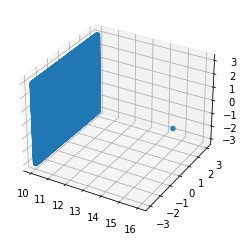

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = [vect[1].x0]
y = [vect[1].y0]
z = [vect[1].z0]
for i in vect:
    x.append(i.x1)
    y.append(i.y1)
    z.append(i.z1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

## Расстояние между двумя точками

In [7]:
def distance(x1, y1, z1, x2, y2, z2):
    return ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(0.5)

### Магия

In [8]:
linsp = np.linspace(3.1, -1, 410)
counter = -1
for i,v in enumerate(vect):
    t1 = time.time()
    
    for x in linsp:
        y = ((x - v.x0)*(v.y1 - v.y0))/(v.x1 - v.x0) + v.y0
        z = ((x - v.x0)*(v.z1 - v.z0))/(v.x1 - v.x0) + v.z0
        if sp.R >= distance(x,y,z,sp.x2, sp.y2, sp.z2):
            v.color = distance(main_camera.camera_coor[1][0],main_camera.camera_coor[1][1],main_camera.camera_coor[1][2],
                              x,y,z)
            break
    
    
    h__h = int(((i/len(vect))*100)//1)
    if counter != h__h:
        t2 = time.time()
        counter = h__h
        print('{}% --time {}--'.format(counter, t2-t1))

0% --time 0.0030012130737304688--
1% --time 0.0010008811950683594--
2% --time 0.0010001659393310547--
3% --time 0.002000093460083008--
4% --time 0.002000570297241211--
5% --time 0.0019998550415039062--
6% --time 0.0012288093566894531--
7% --time 0.002000093460083008--
8% --time 0.0019998550415039062--
9% --time 0.0010001659393310547--
10% --time 0.002000093460083008--
11% --time 0.0020003318786621094--
12% --time 0.0019998550415039062--
13% --time 0.0020008087158203125--
14% --time 0.002001523971557617--
15% --time 0.0020008087158203125--
16% --time 0.0020003318786621094--
17% --time 0.002001047134399414--
18% --time 0.0019998550415039062--
19% --time 0.002000570297241211--
20% --time 0.0020008087158203125--
21% --time 0.002000570297241211--
22% --time 0.0010004043579101562--
23% --time 0.0020008087158203125--
24% --time 0.002000570297241211--
25% --time 0.0020003318786621094--
26% --time 0.0009996891021728516--
27% --time 0.0010001659393310547--
28% --time 0.0010004043579101562--
29% 

In [11]:
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [12]:
# Pygame шаблон - скелет для нового проекта Pygame
import pygame
import random

WIDTH = main_camera.w_dots
HEIGHT = main_camera.h_dots
FPS = 30



pygame.init()
pygame.mixer.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("My Game")
clock = pygame.time.Clock()


running = True
while running:
    clock.tick(FPS)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    screen.fill((0,0,0))
    for i in range(main_camera.w_dots):
        for k, v in enumerate(vect[i*main_camera.h_dots:(i+1)*main_camera.h_dots]):
            if v.color == 1:
                screen.set_at((i,k), (0,0,0))
            else:
                WHITE = ((1-(v.color-13)/(2.7))*250)//1
                screen.set_at((i,k), (WHITE,WHITE,WHITE))
    pygame.display.flip()

pygame.image.save(screen, '1.png')
pygame.quit()


pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [13]:
from PIL import *

In [14]:
main_camera = Camera()
vect = generating_vectors(main_camera)

In [15]:
img = Image.open("1.png")
for i in range(main_camera.w_dots):
    for k, v in enumerate(vect[i*main_camera.h_dots:(i+1)*main_camera.h_dots]):
        if img.getpixel((i,k))[0] == 0:
            v.color = 1
        else:
            v.color = 13+((1-(img.getpixel((i,k))[0]/250))*2.7)

In [16]:
dict_of_dots = {'x':[], 'y': [], 'z':[]}
for v in vect:
    if v.color != 1:
        cos_x = (v.x1-v.x0)/distance(v.x0,v.y0,v.z0,v.x1,v.y1,v.z1)
        cos_y = (v.y1-v.y0)/distance(v.x0,v.y0,v.z0,v.x1,v.y1,v.z1)
        cos_z = (v.z1-v.z0)/distance(v.x0,v.y0,v.z0,v.x1,v.y1,v.z1)

        vec_x = cos_x*v.color + main_camera.camera_coor[1][0]
        vec_y = cos_y*v.color + main_camera.camera_coor[1][1]
        vec_z = cos_z*v.color + main_camera.camera_coor[1][2]

        dict_of_dots['x'].append(vec_x)
        dict_of_dots['y'].append(vec_y)
        dict_of_dots['z'].append(vec_z)


In [17]:
import pandas as pd

df = pd.DataFrame(dict_of_dots)
df.to_csv('Circle.csv',index = False, sep =';')